In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
data = pd.read_csv('/Users/deepshikasharma/Downloads/Viamo_sample/3m_uganda-3m_uganda_000000000013.csv')

In [3]:
#select relevant columns for analysis
mau = data[['call_date','subscriber_id','call_id']]

In [4]:
#convert call_date data type from object to datetime
mau['call_date'] = pd.to_datetime(mau.call_date)

In [5]:
#extract month from call_date column 
mau['Month'] = mau['call_date'].dt.month_name()

In [6]:
#remove call_date column
mau.drop('call_date', inplace = True, axis=1)

In [7]:
#need to custom sort the dataframe by month chronologically
months_categories = ["August", "September", "October", "November"]
mau["Month"] = pd.Categorical(mau["Month"], categories = months_categories)
df = mau.sort_values(by = "Month")

In [8]:
#list of months for the function to loop through
all_months = ['August', 'September','October','November']

In [9]:
#data is dataframe with all rows from every month i.e. df is the parameter
def cleanup(data):
    #loop through all the months in the list
    for x in all_months:
        #get rows in dataframe that correspond to specific month
        maus = df.loc[(df['Month'] == x)]
        #drop the Month columns because we splitting data by month
        maus.drop('Month', inplace = True, axis = 1)
        #how many times does each subscriber_id repeats, tells us how often the subscriber(user) called within that month
        maus_count = maus.pivot_table(columns=['subscriber_id'], aggfunc='size')
        maus_count = pd.DataFrame(maus_count).reset_index()
        maus_count.rename(columns = {0:'# of Calls'}, inplace = True)
        #We are grouping by column # of Calls to see how many users called once, twice, three times, four times etc?
        maus_count = maus_count.groupby('# of Calls').count()
        maus_count = pd.DataFrame(maus_count).reset_index()
        maus_count.rename(columns = {'subscriber_id':'# of Users'}, inplace = True)
        #adds the corresponding month as a constant back into the DataFrame
        maus_count['Month'] = x
        #save the dataframe as dynamic variable
        dynamic_name = str(x)
        globals()[dynamic_name + '_df'] = maus_count

In [10]:
#run function
cleanup(df)

In [11]:
#list all month dataframes to be concatenated 
graph_df = [August_df, September_df, October_df, November_df]
graph_df = pd.concat(graph_df)

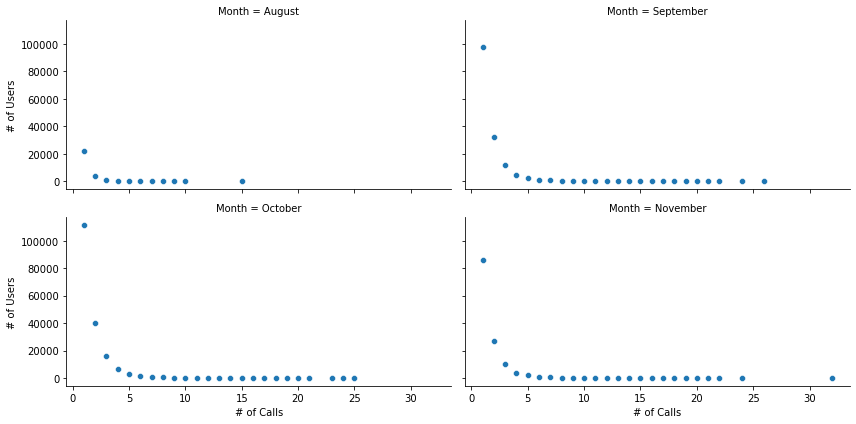

In [12]:
#create plot for how many people called x amomunt times for each month
g = sns.FacetGrid(graph_df, col="Month", height=3, aspect=2, margin_titles=True, col_wrap=2)
g.map(sns.scatterplot, "# of Calls", "# of Users")
plt.savefig('Users_Multiple_Calls.jpeg', bbox_inches='tight')